In [1]:
#!pip install -q keras


[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import keras
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, Bidirectional, Dropout
#from __future__ import print_function
import tensorflow as tf
from tensorflow.python.client import device_lib
from tensorflow import keras
#from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam
import statistics as st

In [3]:
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

In [4]:
# title Default title text
sess = tf.compat.v1.Session(config=tf.compat.v1.ConfigProto(log_device_placement=True))
# print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
# tf.debugging.set_log_device_placement(True)
gpus = tf.config.list_logical_devices('GPU')



Device mapping: no known devices.


In [11]:
complete = pd.read_csv(r'C:\Users\s976791601\RAW_DATA\M_all_information.csv', sep = ',')

In [12]:
#complete.head(1)
complete.columns

Index(['row ID', 'standard_deviation_double', 'ATUAL_soma', 'P_2n_7_str',
       'P_2n_7_int', 'P_3n_26_str', 'P_3n_26_int', 'P_4n_79_str',
       'P_4n_79_int', 'P_5n_187_str',
       ...
       'balanceamento_p_2n_7_int', 'soma_mediana_maior_geral_str',
       'soma_mediana_maior_geral_int', 'variacao_soma_str',
       'variacao_soma_int', 'qtde_variacao_soma_int',
       'faixa_soma_3_layers_int', 'faixa_soma_3_layers_str',
       'faixa_soma_5_layers_int', 'faixa_soma_5_layers_str'],
      dtype='object', length=117)

In [13]:
df = complete
ultimo_concurso = df.tail(n =1)
#df.drop([df.index[-1]],axis=0, inplace=True)
aux = df
penultimo = aux.tail(n = 1)
penultimo = penultimo.filter(['dezena_1','dezena_2','dezena_3','dezena_4','dezena_5','dezena_6'], axis=1)
aux.drop([aux.index[-1]], axis=0, inplace=True)
antepenultimo = aux.tail(n = 1)
antepenultimo = antepenultimo.filter(['dezena_1','dezena_2','dezena_3','dezena_4','dezena_5','dezena_6'], axis=1)

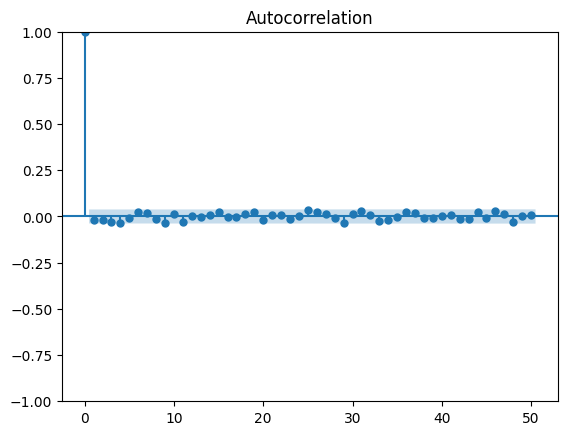

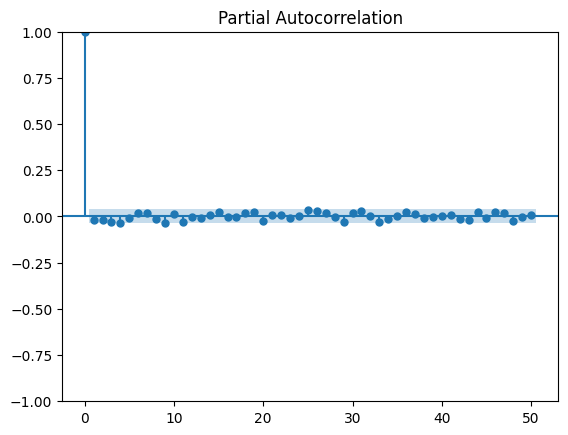

In [16]:
plot_acf(complete.ATUAL_soma, lags=50)
plot_pacf(complete.ATUAL_soma, lags=50)
pyplot.show()

In [17]:
ultimo_concurso = ultimo_concurso.filter(['dezena_1','dezena_2','dezena_3','dezena_4','dezena_5','dezena_6'], axis=1)
print(ultimo_concurso)

      dezena_1  dezena_2  dezena_3  dezena_4  dezena_5  dezena_6
2668        21        24        33        41        48        56


In [ ]:
# DO NOT REMOVE LAST
#complete.drop([complete.index[-1]],axis=0, inplace=True)
#df_filtered = complete[complete["Bin A [1 - 10]_(str)"].str.contains("SIM")]
#df_filtered = df_filtered[df_filtered["Bin D [31 - 40]_(str)"].str.contains("SIM")]
#df_filtered = df_filtered[df_filtered["Bin F [51 - 60]_(str)"].str.contains("SIM")]
#df = df_filtered[df_filtered.maior_qtde_sorteados_fileira_int == 2]

#df = complete[complete.balanceamento_p_2n_7_str == "desbalanceado_para_o_Inicio"]
#df = df[df.occ_max_dist == 1]


In [18]:
media_dez_1 = str(round(st.mean(df.dezena_1)))
media_dez_2 = str(round(st.mean(df.dezena_2)))
media_dez_3 = str(round(st.mean(df.dezena_3)))
media_dez_4 = str(round(st.mean(df.dezena_4)))
media_dez_5 = str(round(st.mean(df.dezena_5)))
media_dez_6 = str(round(st.mean(df.dezena_6)))

In [19]:
print("Palpite por MÉDIA ...: " + media_dez_1 + '-' + media_dez_2 + '-' + media_dez_3 + '-' + media_dez_4 + '-' + media_dez_5 + '-' + media_dez_6 + '\n')
print("....Ultimo concurso....\n")
print(ultimo_concurso)

Palpite por MÉDIA ...: 9-17-26-35-44-52

....Ultimo concurso....

      dezena_1  dezena_2  dezena_3  dezena_4  dezena_5  dezena_6
2668        21        24        33        41        48        56


In [20]:
mediana_dez_1 = str(round(st.median(df.dezena_1)))
mediana_dez_2 = str(round(st.median(df.dezena_2)))
mediana_dez_3 = str(round(st.median(df.dezena_3)))
mediana_dez_4 = str(round(st.median(df.dezena_4)))
mediana_dez_5 = str(round(st.median(df.dezena_5)))
mediana_dez_6 = str(round(st.median(df.dezena_6)))
print("Palpite por Mediana ...: " + mediana_dez_1 + '-' + mediana_dez_2 + '-' + mediana_dez_3 + '-' + mediana_dez_4 + '-' + mediana_dez_5 + '-' + mediana_dez_6)
print("....Ultimo concurso....\n")
print(ultimo_concurso)

Palpite por Mediana ...: 7-16-26-35-45-54
....Ultimo concurso....

      dezena_1  dezena_2  dezena_3  dezena_4  dezena_5  dezena_6
2668        21        24        33        41        48        56


In [21]:
varia_dez_1 = str(round(st.variance(df.dezena_1)))
varia_dez_2 = str(round(st.variance(df.dezena_2)))
varia_dez_3 = str(round(st.variance(df.dezena_3)))
varia_dez_4 = str(round(st.variance(df.dezena_4)))
varia_dez_5 = str(round(st.variance(df.dezena_5)))
varia_dez_6 = str(round(st.variance(df.dezena_6)))

print(antepenultimo)
print(penultimo)
print(ultimo_concurso)
print("Informacões VARIÂNCIA .... " + varia_dez_1 + '-' + varia_dez_2 + '-' + varia_dez_3 + '-' + varia_dez_4 + '-' + varia_dez_5 + '-' + varia_dez_6)

      dezena_1  dezena_2  dezena_3  dezena_4  dezena_5  dezena_6
2667         4         7        16        35        46        54
      dezena_1  dezena_2  dezena_3  dezena_4  dezena_5  dezena_6
2668        21        24        33        41        48        56
      dezena_1  dezena_2  dezena_3  dezena_4  dezena_5  dezena_6
2668        21        24        33        41        48        56
Informacões VARIÂNCIA .... 49-84-99-95-82-49


In [22]:
df = df.filter(['dezena_1','dezena_2','dezena_3','dezena_4','dezena_5','dezena_6'], axis=1)
print(df)

      dezena_1  dezena_2  dezena_3  dezena_4  dezena_5  dezena_6
0            9        37        39        41        43        49
1           10        11        29        30        36        47
2            1         5         6        27        42        59
3            1         2         6        16        19        46
4            7        13        19        22        40        47
...        ...       ...       ...       ...       ...       ...
2663         3        14        21        22        37        39
2664         5        25        29        30        43        47
2665         1         4         8        21        46        51
2666         1        27        30        41        46        57
2667         4         7        16        35        46        54

[2668 rows x 6 columns]


In [24]:
scaler = StandardScaler().fit(df.values)
transformed_dataset = scaler.transform(df.values)
transformed_df = pd.DataFrame(data=transformed_dataset, index=df.index)
transformed_df.head()
# All our games
number_of_rows = df.values.shape[0]
number_of_rows
# Amount of games we need to take into consideration for prediction
#window_length = 10
window_length = 8
window_length
# Balls counts
number_of_features = df.values.shape[1]
number_of_features

6

In [25]:
X = np.empty([number_of_rows - window_length,window_length,number_of_features], dtype=float)
y = np.empty([number_of_rows - window_length, number_of_features], dtype=float)
for i in range(0, number_of_rows-window_length):
    X[i] = transformed_df.iloc[i : i + window_length, 0 : number_of_features]
    y[i] = transformed_df.iloc[i + window_length : i + window_length + 1, 0 : number_of_features]

In [26]:
print(X.shape)
print(y.shape)

(2660, 8, 6)
(2660, 6)


In [27]:
#tf.debugging.set_log_device_placement(True)

#gpus = tf.config.list_logical_devices('GPU')
#if gpus:
tf.config.set_soft_device_placement(True)

try:
  with tf.device('/device:GPU:0'):
    model = Sequential()
    model.add(Bidirectional(LSTM(240, input_shape = (window_length, number_of_features), return_sequences = True)))
    model.add(Dropout(0.2))
    model.add(Bidirectional(LSTM(240, input_shape = (window_length, number_of_features), return_sequences = True)))
    model.add(Dropout(0.2))
    model.add(Bidirectional(LSTM(240, input_shape = (window_length, number_of_features), return_sequences = True)))
    model.add(Bidirectional(LSTM(240, input_shape = (window_length, number_of_features), return_sequences = False)))
    model.add(Dense(59))
    #Finally, let’s add the last output layer
    model.add(Dense(number_of_features))
    model.compile(optimizer=Adam(learning_rate=0.0001), loss ='mse', metrics=['accuracy'])
    #model.fit(x=X, y=y, batch_size=100, epochs=300, verbose=2)
    model.fit(x=X, y=y, batch_size=3, epochs=200, verbose=2)
except RuntimeError as e:
  print(e)


Epoch 1/200

887/887 - 135s - loss: 1.0016 - accuracy: 0.1759 - 135s/epoch - 152ms/step
Epoch 2/200


KeyboardInterrupt: 

In [ ]:
to_predict_for_future = df

In [ ]:
#auxiliar_dois = to_predict_for_future
to_predict_for_future_by_last_3= to_predict_for_future.tail(3)
to_predict_for_future_by_last_5= to_predict_for_future.tail(5)
to_predict_for_future_by_last_7= to_predict_for_future.tail(7)
to_predict_for_future_by_last_8= to_predict_for_future.tail(8)
to_predict_for_future_by_last_10= to_predict_for_future.tail(10)
to_predict_for_future_by_last_15 = to_predict_for_future.tail(15)
to_predict_for_future_by_last_18 = to_predict_for_future.tail(18)
to_predict_for_future_by_last_20 = to_predict_for_future.tail(20)
to_predict_for_future_by_last_25 = to_predict_for_future.tail(25)
to_predict_for_future_by_last_30 = to_predict_for_future.tail(30)
to_predict_for_future_by_last_35 = to_predict_for_future.tail(35)
to_predict_for_future_by_last_45 = to_predict_for_future.tail(45)
to_predict_for_future_by_last_60 = to_predict_for_future.tail(60)

In [ ]:
to_predict = np.array(to_predict_for_future_by_last_3)
scaled_to_predict = scaler.transform(to_predict)
y_pred = model.predict(np.array([scaled_to_predict]))
y_pred_denormalized = scaler.inverse_transform(y_pred).astype(int)[0]
#result.append({'palpites': y_pred_denormalized}, ignore_index=True)
print("Predicted numbers for next lottery game are:", y_pred_denormalized)
print("....Ultimo concurso....\n")
print(ultimo_concurso)

In [ ]:
to_predict_5 = np.array(to_predict_for_future_by_last_5)
scaled_to_predict = scaler.transform(to_predict_5)
y_pred = model.predict(np.array([scaled_to_predict]))
y_pred_denormalized = scaler.inverse_transform(y_pred).astype(int)[0]
#result.append({'palpites': y_pred_denormalized}, ignore_index=True)
print("Predicted numbers for next lottery game are:", y_pred_denormalized)
print("....Ultimo concurso....\n")
print(ultimo_concurso)

In [ ]:
to_predict_7 = np.array(to_predict_for_future_by_last_7)
scaled_to_predict = scaler.transform(to_predict_7)
y_pred = model.predict(np.array([scaled_to_predict]))
y_pred_denormalized = scaler.inverse_transform(y_pred).astype(int)[0]
#result.append({'palpites': y_pred_denormalized}, ignore_index=True)
print("Predicted numbers for next lottery game are:", y_pred_denormalized)
print("....Ultimo concurso....\n")
print(ultimo_concurso)

In [ ]:
to_predict_8 = np.array(to_predict_for_future_by_last_8)
scaled_to_predict = scaler.transform(to_predict_8)
y_pred = model.predict(np.array([scaled_to_predict]))
y_pred_denormalized = scaler.inverse_transform(y_pred).astype(int)[0]
#result.append({'palpites': y_pred_denormalized}, ignore_index=True)
print("Predicted numbers for next lottery game are:", y_pred_denormalized)
print("....Ultimo concurso....\n")
print(ultimo_concurso)

In [ ]:
to_predict_10 = np.array(to_predict_for_future_by_last_10)
scaled_to_predict = scaler.transform(to_predict_10)
y_pred = model.predict(np.array([scaled_to_predict]))
y_pred_denormalized = scaler.inverse_transform(y_pred).astype(int)[0]
#result.append({'palpites': y_pred_denormalized}, ignore_index=True)
print("Predicted numbers for next lottery game are:", y_pred_denormalized)
print("....Ultimo concurso....\n")
print(ultimo_concurso)

In [ ]:
to_predict_15 = np.array(to_predict_for_future_by_last_15)
scaled_to_predict = scaler.transform(to_predict_15)
y_pred = model.predict(np.array([scaled_to_predict]))
y_pred_denormalized = scaler.inverse_transform(y_pred).astype(int)[0]
#result.append({'palpites': y_pred_denormalized}, ignore_index=True)
print("Predicted numbers for next lottery game are:", y_pred_denormalized)
print("....Ultimo concurso....\n")
print(ultimo_concurso)

In [ ]:
to_predict_18 = np.array(to_predict_for_future_by_last_18)
scaled_to_predict = scaler.transform(to_predict_18)
y_pred = model.predict(np.array([scaled_to_predict]))
y_pred_denormalized = scaler.inverse_transform(y_pred).astype(int)[0]
#result.append({'palpites': y_pred_denormalized}, ignore_index=True)
print("Predicted numbers for next lottery game are:", y_pred_denormalized)
print("....Ultimo concurso....\n")
print(ultimo_concurso)

In [ ]:
to_predict_20 = np.array(to_predict_for_future_by_last_20)
scaled_to_predict = scaler.transform(to_predict_20)
y_pred = model.predict(np.array([scaled_to_predict]))
y_pred_denormalized = scaler.inverse_transform(y_pred).astype(int)[0]
#result.append({'palpites': y_pred_denormalized}, ignore_index=True)
print("Predicted numbers for next lottery game are:", y_pred_denormalized)
print("....Ultimo concurso....\n")
print(ultimo_concurso)

In [ ]:
to_predict_25 = np.array(to_predict_for_future_by_last_25)
scaled_to_predict = scaler.transform(to_predict_25)
y_pred = model.predict(np.array([scaled_to_predict]))
y_pred_denormalized = scaler.inverse_transform(y_pred).astype(int)[0]
#result.append({'palpites': y_pred_denormalized}, ignore_index=True)
print("Predicted numbers for next lottery game are:", y_pred_denormalized)
print("....Ultimo concurso....\n")
print(ultimo_concurso)

In [ ]:
to_predict_30 = np.array(to_predict_for_future_by_last_30)
scaled_to_predict = scaler.transform(to_predict_30)
y_pred = model.predict(np.array([scaled_to_predict]))
y_pred_denormalized = scaler.inverse_transform(y_pred).astype(int)[0]
#result.append({'palpites': y_pred_denormalized}, ignore_index=True)
print("Predicted numbers for next lottery game are:", y_pred_denormalized)
print("....Ultimo concurso....\n")
print(ultimo_concurso)

In [ ]:
to_predict_35 = np.array(to_predict_for_future_by_last_35)
scaled_to_predict = scaler.transform(to_predict_35)
y_pred = model.predict(np.array([scaled_to_predict]))
y_pred_denormalized = scaler.inverse_transform(y_pred).astype(int)[0]
#result.append({'palpites': y_pred_denormalized}, ignore_index=True)
print("Predicted numbers for next lottery game are:", y_pred_denormalized)
print("....Ultimo concurso....\n")
print(ultimo_concurso)

In [ ]:
to_predict_45 = np.array(to_predict_for_future_by_last_45)
scaled_to_predict = scaler.transform(to_predict_45)
y_pred = model.predict(np.array([scaled_to_predict]))
y_pred_denormalized = scaler.inverse_transform(y_pred).astype(int)[0]
#result.append({'palpites': y_pred_denormalized}, ignore_index=True)
print("Predicted numbers for next lottery game are:", y_pred_denormalized)
print("....Ultimo concurso....\n")
print(ultimo_concurso)

In [ ]:
to_predict_55 = np.array(to_predict_for_future_by_last_55)
scaled_to_predict = scaler.transform(to_predict_55)
y_pred = model.predict(np.array([scaled_to_predict]))
y_pred_denormalized = scaler.inverse_transform(y_pred).astype(int)[0]
#result.append({'palpites': y_pred_denormalized}, ignore_index=True)
print("Predicted numbers for next lottery game are:", y_pred_denormalized)
print("....Ultimo concurso....\n")
print(ultimo_concurso)